In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&lat={lat}&lon={lon}&appid=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | kargil
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | cayenne
Processing Record 6 of Set 1 | hofn
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | yefira
City not found. Skipping...
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | barra do garcas
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | 

Processing Record 32 of Set 4 | rehoboth
Processing Record 33 of Set 4 | aksu
Processing Record 34 of Set 4 | kumluca
Processing Record 35 of Set 4 | sorong
Processing Record 36 of Set 4 | madang
Processing Record 37 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 4 | alofi
Processing Record 39 of Set 4 | verkhnyaya inta
Processing Record 40 of Set 4 | port lincoln
Processing Record 41 of Set 4 | bac lieu
Processing Record 42 of Set 4 | padang
Processing Record 43 of Set 4 | hobyo
Processing Record 44 of Set 4 | alice town
Processing Record 45 of Set 4 | narsaq
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | waingapu
Processing Record 48 of Set 4 | darhan
Processing Record 49 of Set 4 | castro
Processing Record 50 of Set 4 | tuktoyaktuk
Processing Record 1 of Set 5 | ormara
Processing Record 2 of Set 5 | vila velha
Processing Record 3 of Set 5 | mirnyy
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | high

Processing Record 30 of Set 8 | slave lake
Processing Record 31 of Set 8 | isiro
Processing Record 32 of Set 8 | yanan
City not found. Skipping...
Processing Record 33 of Set 8 | bilma
Processing Record 34 of Set 8 | mazagao
Processing Record 35 of Set 8 | spornoye
Processing Record 36 of Set 8 | barvinkove
Processing Record 37 of Set 8 | kapoeta
Processing Record 38 of Set 8 | revda
Processing Record 39 of Set 8 | amderma
City not found. Skipping...
Processing Record 40 of Set 8 | clarence town
Processing Record 41 of Set 8 | dera ghazi khan
Processing Record 42 of Set 8 | mahebourg
Processing Record 43 of Set 8 | saint george
Processing Record 44 of Set 8 | inhambane
Processing Record 45 of Set 8 | ternate
Processing Record 46 of Set 8 | vostochnyy
Processing Record 47 of Set 8 | camacha
Processing Record 48 of Set 8 | pacasmayo
Processing Record 49 of Set 8 | torbay
Processing Record 50 of Set 8 | souillac
Processing Record 1 of Set 9 | srivardhan
Processing Record 2 of Set 9 | duxb

Processing Record 18 of Set 12 | la romana
Processing Record 19 of Set 12 | manicore
Processing Record 20 of Set 12 | barinas
Processing Record 21 of Set 12 | kashi
Processing Record 22 of Set 12 | wagar
Processing Record 23 of Set 12 | aswan
Processing Record 24 of Set 12 | konevo
Processing Record 25 of Set 12 | miramar
Processing Record 26 of Set 12 | hualmay
Processing Record 27 of Set 12 | ornskoldsvik
Processing Record 28 of Set 12 | caravelas
Processing Record 29 of Set 12 | nishihara
Processing Record 30 of Set 12 | san rafael
Processing Record 31 of Set 12 | anzio
Processing Record 32 of Set 12 | mizoch
Processing Record 33 of Set 12 | tarhunah
City not found. Skipping...
Processing Record 34 of Set 12 | umm kaddadah
Processing Record 35 of Set 12 | zhigansk
Processing Record 36 of Set 12 | dutse
Processing Record 37 of Set 12 | shagonar
Processing Record 38 of Set 12 | mehamn
Processing Record 39 of Set 12 | ugoofaaru
Processing Record 40 of Set 12 | gualaquiza
Processing Rec

In [10]:
len(city_data)

581

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,84.27,66,40,6.91,US,2022-09-12 21:40:43
1,Kargil,34.5667,76.1000,50.85,55,0,5.64,IN,2022-09-12 21:40:43
2,Klaksvik,62.2266,-6.5890,50.92,92,91,16.60,FO,2022-09-12 21:40:44
3,Ushuaia,-54.8000,-68.3000,46.06,53,40,4.61,AR,2022-09-12 21:40:44
4,Cayenne,4.9333,-52.3333,82.44,74,10,5.75,GF,2022-09-12 21:40:44
5,Hofn,64.2539,-15.2082,49.57,81,100,1.79,IS,2022-09-12 21:40:45
6,Cherskiy,68.7500,161.3000,38.57,96,100,5.93,RU,2022-09-12 21:40:45
7,East London,-33.0153,27.9116,57.29,63,15,10.69,ZA,2022-09-12 21:40:46
8,Port Alfred,-33.5906,26.8910,55.53,73,0,13.24,ZA,2022-09-12 21:40:46
9,Barra Do Garcas,-15.8900,-52.2567,97.38,32,75,6.91,BR,2022-09-12 21:36:48


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-09-12 21:40:43,19.7297,-155.0900,84.27,66,40,6.91
1,Kargil,IN,2022-09-12 21:40:43,34.5667,76.1000,50.85,55,0,5.64
2,Klaksvik,FO,2022-09-12 21:40:44,62.2266,-6.5890,50.92,92,91,16.60
3,Ushuaia,AR,2022-09-12 21:40:44,-54.8000,-68.3000,46.06,53,40,4.61
4,Cayenne,GF,2022-09-12 21:40:44,4.9333,-52.3333,82.44,74,10,5.75
...,...,...,...,...,...,...,...,...,...
576,Pasni,PK,2022-09-12 21:56:01,25.2631,63.4710,79.59,91,6,7.83
577,Marsaxlokk,MT,2022-09-12 21:56:02,35.8419,14.5431,79.09,73,0,1.14
578,Gat,IL,2022-09-12 21:51:59,31.6100,34.7642,77.68,100,0,0.78
579,Hanna,CA,2022-09-12 21:56:02,51.6334,-111.9018,71.85,32,94,1.01


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

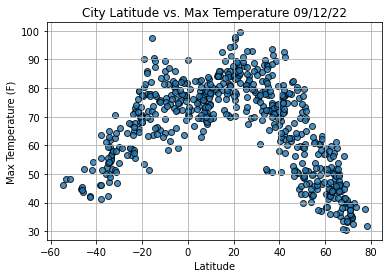

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

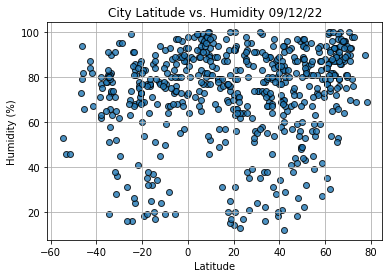

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

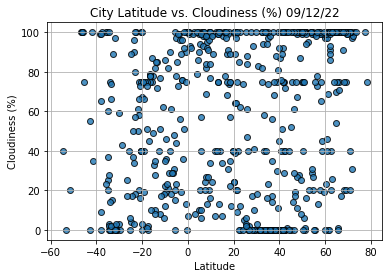

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

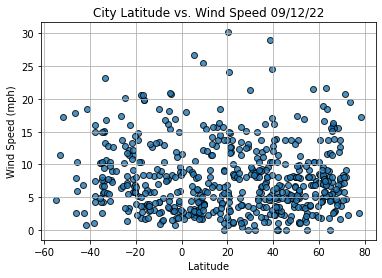

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()